In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive

        drive.mount("/content/drive")
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [41]:
import os
import sys
from pathlib import Path

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [42]:
# haotian comp
import os
import sys
from pathlib import Path

if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("working dir:", workding_dir)

working dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [43]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [44]:
model_orders = {
    "internlm2_5-7b-chat-1m": 10,
    "Qwen2-7B-Instruct": 20,
    "Llama3.1-8B-Chinese-Chat": 30,
    "Llama3.1-70B-Chinese-Chat": 40,
    "Qwen2-72B-Instruct": 50,
}

In [45]:
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
model_markers = {k: markers[i] for i, k in enumerate(model_orders.keys())}

In [46]:
import pandas as pd

perf_df = None
model_perf_dfs = {}
for model_name in model_orders.keys():
    metrics_csv = f"data/{model_name}_metrics.csv"
    if not Path(metrics_csv).exists():
        continue
    df = pd.read_csv(metrics_csv)
    model_perf_dfs[model_name] = df
    perf_df = df if perf_df is None else pd.concat([perf_df, df])

perf_df

epoch                                              model  accuracy  \
0     0.0  internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf  0.510667   
1     0.2  internlm/internlm2_5-7b-chat-1m/checkpoint-35_...  0.784333   
2     0.4  internlm/internlm2_5-7b-chat-1m/checkpoint-70_...  0.783667   
3     0.6  internlm/internlm2_5-7b-chat-1m/checkpoint-105...  0.724333   
4     0.8  internlm/internlm2_5-7b-chat-1m/checkpoint-140...  0.803000   
5     1.0  internlm/internlm2_5-7b-chat-1m/checkpoint-175...  0.767667   
6     1.2  internlm/internlm2_5-7b-chat-1m/checkpoint-210...  0.773667   
7     1.4  internlm/internlm2_5-7b-chat-1m/checkpoint-245...  0.762333   
8     1.6  internlm/internlm2_5-7b-chat-1m/checkpoint-280...  0.755333   
9     1.8  internlm/internlm2_5-7b-chat-1m/checkpoint-315...  0.748000   
10    2.0  internlm/internlm2_5-7b-chat-1m/checkpoint-350...  0.756000   
0     0.0            Qwen/Qwen2-7B-Instruct_torch.float16_lf  0.619333   
1     0.2  Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.flo...  0.725000   
2     0.4  Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.flo...  0.759000   
3     0.6  Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.fl...  0.692667   
4     0.8  Qwen/Qwen2-7B-Instruct/checkpoint-140_torch.fl...  0.725000   
5     1.0  Qwen/Qwen2-7B-Instruct/checkpoint-175_torch.fl...  0.675667   
6     1.2  Qwen/Qwen2-7B-Instruct/checkpoint-210_torch.fl...  0.701333   
7     1.4  Qwen/Qwen2-7B-Instruct/checkpoint-245_torch.fl...  0.732667   
8     1.6  Qwen/Qwen2-7B-Instruct/checkpoint-280_torch.fl...  0.698333   
9     1.8  Qwen/Qwen2-7B-Instruct/checkpoint-315_torch.fl...  0.678333   
10    2.0  Qwen/Qwen2-7B-Instruct/checkpoint-350_torch.fl...  0.689000   
0     0.0  shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.fl...  0.236667   
1     0.2  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.625667   
2     0.4  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.762000   
3     0.6  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.680333   
4     0.8  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.752333   
5     1.0  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.737000   
0     0.0     Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf  0.747333   
1     0.2  Qwen/Qwen2-72B-Instruct/checkpoint-35_torch.bf...  0.758333   
2     0.4  Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bf...  0.736667   
3     0.6  Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.b...  0.757000   
4     0.8  Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.b...  0.789333   
5     1.0  Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.b...  0.737667   
6     1.2  Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.b...  0.763000   

    precision    recall        f1  
0    0.743214  0.510667  0.535733  
1    0.797765  0.784333  0.786494  
2    0.799698  0.783667  0.788688  
3    0.817117  0.724333  0.756580  
4    0.803141  0.803000  0.802806  
5    0.810844  0.767667  0.784319  
6    0.809167  0.773667  0.787687  
7    0.806229  0.762333  0.777669  
8    0.808620  0.755333  0.775559  
9    0.817200  0.748000  0.773991  
10   0.812688  0.756000  0.777781  
0    0.755570  0.619333  0.672630  
1    0.784017  0.725000  0.748995  
2    0.800530  0.759000  0.774875  
3    0.803918  0.692667  0.733248  
4    0.795272  0.725000  0.747624  
5    0.781015  0.675667  0.708654  
6    0.796956  0.701333  0.736268  
7    0.792254  0.732667  0.755402  
8    0.785127  0.698333  0.729225  
9    0.785391  0.678333  0.716413  
10   0.792972  0.689000  0.725999  
0    0.745718  0.236667  0.339624  
1    0.827414  0.625667  0.693570  
2    0.789946  0.762000  0.766701  
3    0.798030  0.680333  0.721244  
4    0.807426  0.752333  0.773644  
5    0.809059  0.737000  0.763784  
0    0.804122  0.747333  0.760783  
1    0.819993  0.758333  0.782751  
2    0.822487  0.736667  0.770063  
3    0.825382  0.757000  0.784000  
4    0.822910  0.789333  0.803312  
5    0.824365  0.737667  0.769962  
6    0.831888  0.763000  0.790108

In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_perf(
    model_perf_dfs,
    model_markers,
    x_major_locator=0.2,
    y_offset=0.05,
):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    for model_name, perf_df in model_perf_dfs.items():
        # Ensure the lengths of perf_df["epoch"], perf_df["accuracy"], and perf_df["f1"] are the same
        min_length = min(len(perf_df["epoch"]), len(perf_df["accuracy"]), len(perf_df["f1"]))
        perf_df = perf_df.iloc[:min_length]

        ax.plot(
            perf_df["epoch"], perf_df["f1"], marker=model_markers[model_name], label=model_name
        )

        best_f1 = perf_df["f1"].idxmax()
        ax.annotate(
            f"{perf_df['f1'].iloc[best_f1]*100:.2f}%",
            (perf_df["epoch"].iloc[best_f1], perf_df["f1"].iloc[best_f1]),
            ha="center",
            va="bottom",
            xytext=(0, 0),
            textcoords="offset points",
            fontsize=10,
        )

    # Set y-axis limit
    y_scales = ax.get_ylim()
    ax.set_ylim(y_scales[0], y_scales[1] + y_offset)

    # Add title and labels
    ax.set_xlabel("Epoch (0: base model, 0.2 - 2: fine-tuned models)")
    ax.set_ylabel("F1 Score")

    # Set x-axis grid spacing to 0.2
    ax.xaxis.set_major_locator(MultipleLocator(x_major_locator))
    ax.set_title(
        "Performance Analysis Across Checkpoints for Models"
    )

    # Rotate x labels
    plt.xticks(rotation=0)
    plt.grid(True)
    # plt.tight_layout()

    # Set legend at the right to avoid overlapping with lines
    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

    plt.show()

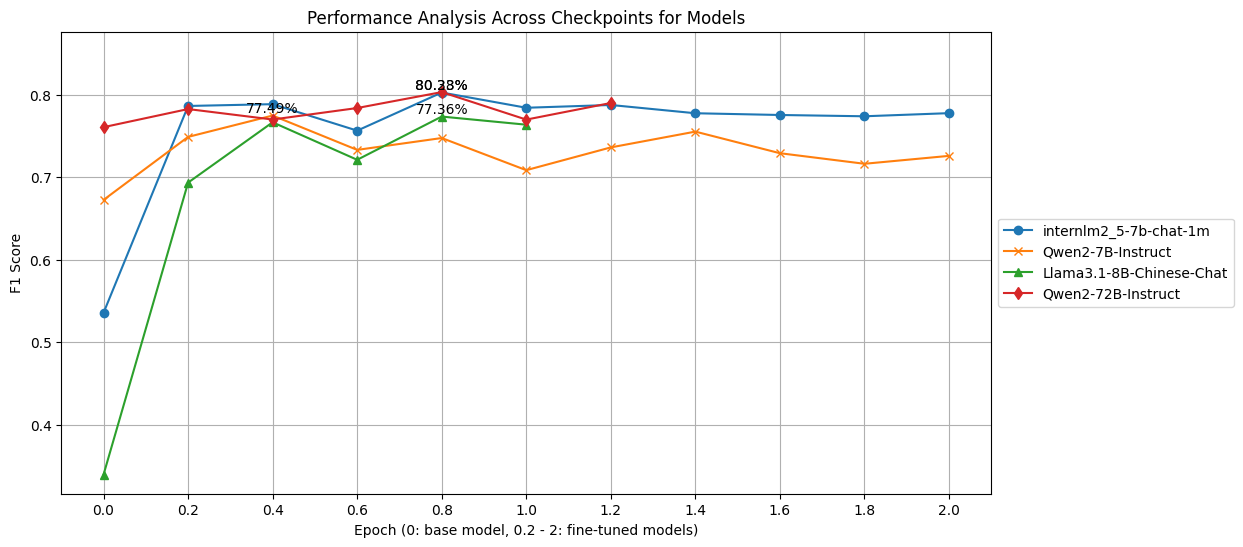

In [48]:
plot_perf(model_perf_dfs, model_markers)